In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, median_abs_deviation

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
numeric_cols = ['age','bmi','HbA1c_level','blood_glucose_level']
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (df[col] < lower) | (df[col] > upper)
    outlier_counts[col] = mask.sum()

print("Outliner number: ", outlier_counts)
print("Outliner proportion: ", {col:cnt/len(df)*100  for col,cnt in outlier_counts.items()})

Outliner number:  {'age': 0, 'bmi': 7086, 'HbA1c_level': 1315, 'blood_glucose_level': 2038}
Outliner proportion:  {'age': 0.0, 'bmi': 7.086, 'HbA1c_level': 1.315, 'blood_glucose_level': 2.038}


In [21]:
outlier_percentages = {}

for col in numeric_cols:
    col_flag = f'{col}_iqr_outlier'
    outlier_count = outlier_flags[col_flag].sum()
    percent = (outlier_count / len(df)) * 100
    outlier_percentages[col] = percent

# Display nicely
for col, pct in outlier_percentages.items():
    print(f"{col}: {pct:.2f}% outliers")


age: 0.00% outliers
bmi: 7.09% outliers
HbA1c_level: 1.31% outliers
blood_glucose_level: 2.04% outliers


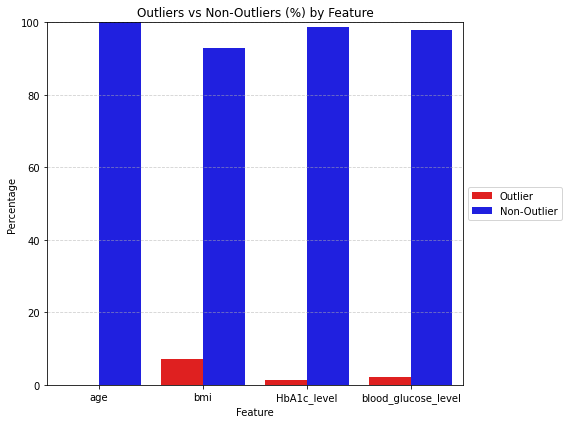

In [26]:

# Your existing percentages
outlier_percentages = {
    'age': 0.00,
    'bmi': 7.09,
    'HbA1c_level': 1.31,
    'blood_glucose_level': 2.04
}

# Compute non-outlier percentages
visual_df = pd.DataFrame({
    'Feature': list(outlier_percentages.keys()),
    'Outlier': list(outlier_percentages.values())
})
visual_df['Non-Outlier'] = 100 - visual_df['Outlier']

# Melt for plotting
plot_df = visual_df.melt(id_vars='Feature', value_vars=['Outlier', 'Non-Outlier'],
                         var_name='Type', value_name='Percentage')

# Define color map
palette = {'Outlier': 'red', 'Non-Outlier': 'blue'}

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=plot_df, x='Feature', y='Percentage', hue='Type', palette=palette)
plt.title("Outliers vs Non-Outliers (%) by Feature")
plt.ylabel("Percentage")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Move legend to the right
plt.legend(title="", loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()
